<a href="https://colab.research.google.com/github/s-c-soma/AdvanceDeeplearning-CMPE-297/blob/master/Assignment_2/Assignment_2c_Augmentation_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Augmentation Techniques and Ablation Study

* Mixup
* Label smoothing
* Cutout  
* Test time


* This colab contains code for different augmentation studies called mixup, label smoothing, cutout  and test time. In this way, detailed ablation studies have been done to see the impact of using different techniques.

* I have used CIFAR-10 dataset for this. At first model is implemented without using any agumention techniques. The accuracy is 68% after only 10 epochs. 

* In section 1, cutout technique is used to introduced noise with setting -cutout(n_holes=(1,4), length=(8, 20), p=1.). The accuracy now drops to 47% for same number of epochs for the same dataset.

* In section 2, Mixup augention technique is applied on cutout dataset which reduces the accuracy to 40% with same model settings.

* Section 3 shows the accuracy of using label smoothing technique with cutout dataset. This time accuracy becomes 42%

* Finally section 4 has the implementation test time augmentation. For that accuracy is now 43% after 10 epochs on Cifar dataset. 

* From this thorough abalation study, it is confirmed that introducing noise using different augmention techniques lowers that accuracy but make model more robust and generalized.

In [ ]:
#Importing fastai will also import numpy, pytorch, etc.
%matplotlib inline
%reload_ext autoreload
%autoreload 2
 
from fastai.vision import *
from numbers import Integral
import seaborn as sns


from sklearn.datasets import make_moons, make_blobs, make_circles, make_classification
import pdb
import contextlib
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load CIFAR-10 Data

In [ ]:
path = untar_data(URLs.CIFAR)

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/train'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt')]

## Hyperparameters

In [ ]:
bs = 64 # batch size
img_size = 24 # image size

## Creating Image Data Bunch

In [ ]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), valid='test', size=img_size, bs = bs) 
#data = (ImageItemList.from_folder(path) .random_split_by_pct() .label_from_folder() .transform(tfms, size=224) .databunch())

# normalising the dataset using the same normalisation applied to the imagenet dataset
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
ship,ship,ship,ship,ship
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
ship,ship,ship,ship,ship
Path: /root/.fastai/data/cifar10;

Test: None

## Visualizing the Data

In [ ]:
print(data.classes)
len(data.classes),data.c

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(10, 10)

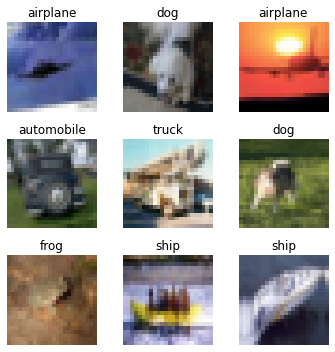

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

## Training the Model

In [ ]:
#learn = ConvLearner(data, models.resnet50, metrics=error_rate)
learn = create_cnn(data, models.resnet34, metrics=accuracy)
#learn =  cnn_learner(data, models.resnet34, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(10) #10

epoch,train_loss,valid_loss,accuracy,time
0,2.055951,1.716628,0.412900,00:45
1,1.631903,1.454971,0.477900,00:46
2,1.419421,1.268151,0.545500,00:45
3,1.287242,1.132049,0.598400,00:45
4,1.202526,1.053227,0.629600,00:46
5,1.141942,0.999824,0.648500,00:46
6,1.091215,0.974712,0.655700,00:46
7,1.052491,0.952632,0.664400,00:46
8,1.038795,0.939340,0.664400,00:46
9,1.026990,0.940751,0.667600,00:46


In [ ]:
learn.save('stage-1') # saving the model weights

In [ ]:
learn.load('stage-1') # loading the model weights

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
ship,ship,ship,ship,ship
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
ship,ship,ship,ship,ship
Path: /root/.fastai/data/cifar10;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

## Model Evaluation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

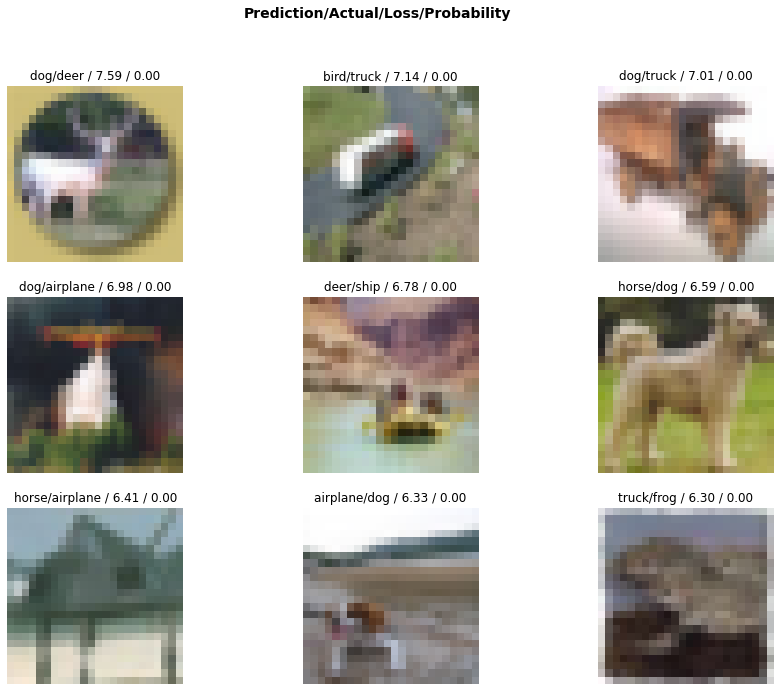

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
doc(interp.plot_top_losses)

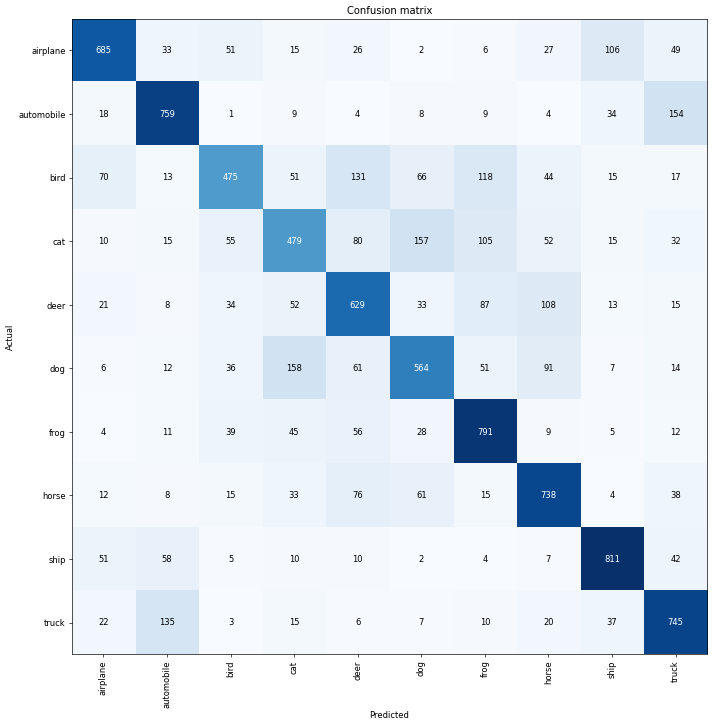

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('dog', 'cat', 158),
 ('cat', 'dog', 157),
 ('automobile', 'truck', 154),
 ('truck', 'automobile', 135),
 ('bird', 'deer', 131),
 ('bird', 'frog', 118),
 ('deer', 'horse', 108),
 ('airplane', 'ship', 106),
 ('cat', 'frog', 105),
 ('dog', 'horse', 91),
 ('deer', 'frog', 87),
 ('cat', 'deer', 80),
 ('horse', 'deer', 76),
 ('bird', 'airplane', 70),
 ('bird', 'dog', 66),
 ('dog', 'deer', 61),
 ('horse', 'dog', 61),
 ('ship', 'automobile', 58),
 ('frog', 'deer', 56),
 ('cat', 'bird', 55),
 ('cat', 'horse', 52),
 ('deer', 'cat', 52),
 ('airplane', 'bird', 51),
 ('bird', 'cat', 51),
 ('dog', 'frog', 51),
 ('ship', 'airplane', 51),
 ('airplane', 'truck', 49),
 ('frog', 'cat', 45),
 ('bird', 'horse', 44),
 ('ship', 'truck', 42),
 ('frog', 'bird', 39),
 ('horse', 'truck', 38),
 ('truck', 'ship', 37),
 ('dog', 'bird', 36),
 ('automobile', 'ship', 34),
 ('deer', 'bird', 34),
 ('airplane', 'automobile', 33),
 ('deer', 'dog', 33),
 ('horse', 'cat', 33),
 ('cat', 'truck', 32),
 ('frog', 'dog', 28),


# 1.Cutout

In [ ]:
tfms = [cutout(n_holes=(1,4), length=(8, 20), p=1.),cutout(n_holes=(1,4), length=(8,20), p=1.)]
#aug_tfms = [cutout(n_holes=10, length=20, tfm_y=TfmType.NO)]


In [ ]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid='test', size=img_size, bs = bs) 
#data = (ImageItemList.from_folder(path) .random_split_by_pct() .label_from_folder() .transform(tfms, size=224) .databunch())

# normalising the dataset using the same normalisation applied 
data.normalize(imagenet_stats)
#plots_of_one_image(img_url,tfms)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
ship,ship,ship,ship,ship
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
ship,ship,ship,ship,ship
Path: /root/.fastai/data/cifar10;

Test: None

In [ ]:
print(data.classes)
len(data.classes),data.c

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(10, 10)

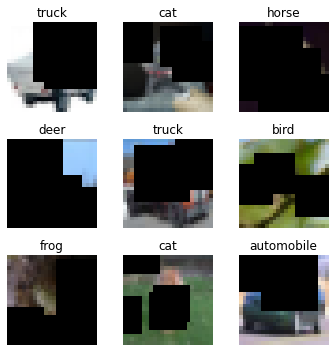

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

### Model

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [ ]:
learn.fit_one_cycle(10) #10

epoch,train_loss,valid_loss,accuracy,time
0,2.483033,2.129109,0.257700,00:41
1,2.067453,1.989253,0.275300,00:41
2,1.943047,1.853885,0.314400,00:41
3,1.827757,1.745078,0.366100,00:41
4,1.756990,1.689161,0.388200,00:42
5,1.699336,1.637144,0.404700,00:41
6,1.689571,1.629068,0.403400,00:41
7,1.662820,1.604113,0.418100,00:41
8,1.637315,1.592602,0.427700,00:41
9,1.646636,1.594776,0.419300,00:41


# 2.Cutout + Mixup

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=accuracy).mixup()

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [ ]:
learn.fit_one_cycle(10) #10

epoch,train_loss,valid_loss,accuracy,time
0,2.519275,2.183941,0.236500,00:42
1,2.174038,2.054785,0.247900,00:42
2,2.080887,1.919366,0.298100,00:43
3,1.996518,1.827309,0.333300,00:42
4,1.947453,1.743336,0.363200,00:43
5,1.900551,1.699980,0.383700,00:42
6,1.880451,1.673868,0.398800,00:41
7,1.869049,1.659856,0.401900,00:41
8,1.870083,1.655466,0.404000,00:41
9,1.875980,1.649603,0.408700,00:42


# 3.Cutout + Label smoothing

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=accuracy,loss_func=LabelSmoothingCrossEntropy())


/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [ ]:
learn.fit_one_cycle(10) #10

epoch,train_loss,valid_loss,accuracy,time
0,2.466229,2.179050,0.245900,00:41
1,2.135720,2.057770,0.269900,00:41
2,2.011455,1.947443,0.319400,00:41
3,1.924440,1.876423,0.358900,00:41
4,1.874391,1.819222,0.382700,00:41
5,1.836758,1.786375,0.401400,00:40
6,1.810678,1.757358,0.419800,00:40
7,1.761011,1.746810,0.423900,00:41
8,1.777347,1.733114,0.421800,00:40
9,1.770637,1.740116,0.422100,00:41


# 4.Test time

In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets

target_size= 128
valdir = path/'test'

# TTA Augmentations
min_scale = 0.5
trn_tfms = [transforms.RandomResizedCrop(target_size, scale=(min_scale, 1.0)),
            transforms.RandomHorizontalFlip()]
tta_aug_dataset = datasets.ImageFolder(valdir, transforms.Compose(trn_tfms))

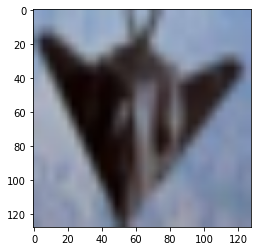

In [ ]:
plt.imshow(tta_aug_dataset[9][0])

In [ ]:
tta_aug_dataset = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid='test', size=img_size, bs = bs) 

In [ ]:
learn = create_cnn(tta_aug_dataset, models.resnet34, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [ ]:
learn.fit_one_cycle(10) #10

epoch,train_loss,valid_loss,accuracy,time
0,2.455509,2.141647,0.240000,00:40
1,2.072419,1.976756,0.275300,00:40
2,1.951697,1.872675,0.311800,00:40
3,1.820030,1.767463,0.352600,00:40
4,1.747012,1.685903,0.390600,00:41
5,1.705681,1.639212,0.407900,00:41
6,1.662422,1.620684,0.410700,00:41
7,1.634290,1.588057,0.421400,00:41
8,1.625500,1.603681,0.420100,00:41
9,1.623302,1.588220,0.428700,00:41
